<a href="https://colab.research.google.com/github/ThisIsFarhan/Langgraph-tutorials/blob/main/3_Router.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

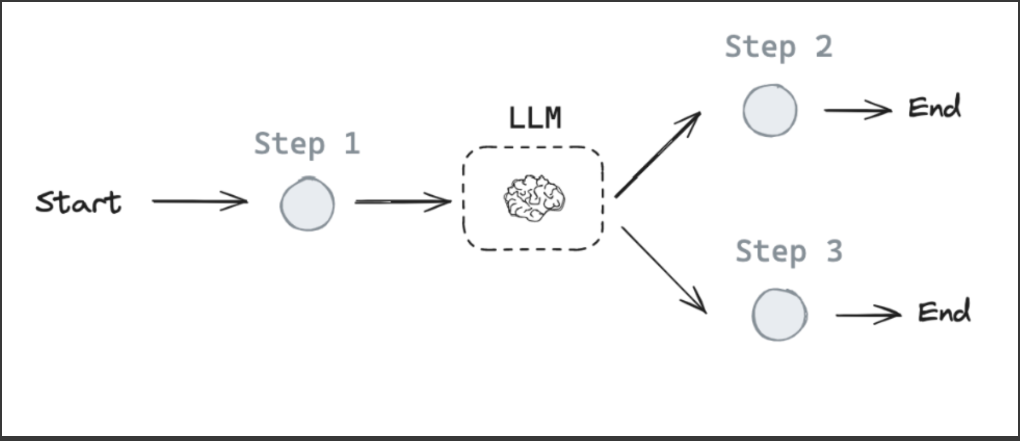


Let's extend our graph to work with either output!

For this, we can use two ideas:

(1) Add a node that will call our tool.

(2) Add a conditional edge that will look at the chat model model output, and route to our tool calling node or simply end if no tool call is performed.

In [1]:
%pip install --quiet -U langchain_groq langchain_core langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
from langchain_groq import ChatGroq

groq_api_key=userdata.get('groq_api_key')
llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama-3.3-70b-versatile")

In [3]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

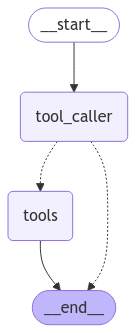

In [5]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


#Node definition
def tool_calling_llm(state:MessagesState):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}



builder = StateGraph(MessagesState)
builder.add_node("tool_caller",tool_calling_llm)
builder.add_node("tools",ToolNode([multiply])) # If the latest message (result) from assistant is a tool call -> tools_condition routes to "tools" node
                                                    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END

builder.add_edge(START, "tool_caller")
builder.add_conditional_edges("tool_caller",tools_condition)
builder.add_edge('tools', END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Whats the benefit of multiplication?")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Whats the benefit of multiplication?
================================== Ai Message ==================================

Multiplication has numerous benefits, including:

1. Simplifying repeated addition: Multiplication allows us to quickly calculate the result of adding a number a certain number of times. For example, instead of adding 4 + 4 + 4 + 4 + 4, we can simply multiply 4 by 5.

2. Solving real-world problems: Multiplication is used in a wide range of real-world applications, such as calculating the area of a room, the cost of items in bulk, or the distance traveled over a certain period of time.

3. Improving mental math skills: Practicing multiplication can help improve mental math skills, such as estimating quantities, calculating tips, or determining the cost of items.

4. Enhancing problem-solving skills: Multiplication is often used in conjunction with other mathematical operations, such as di